In [1]:
import pandas as pd
import numpy as np

## `pandas` is mostly about manipulating tables of data

See this cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


Pandas es una librería escrita sobre NumPy, que adiciona formas eficientes de trabajar con datos estructurados. Algunas veces, es conveniente pensar en Pandas como una librería que implementa operaciones familiares a las de una tabla en una base de datos (o incluso múltiples tablas) o a las operaciones básicas de programas como Google Spreadsheets o Microsoft Excel.

## Pandas main object is a `DataFrame`

- Can read .csv, JSON, .excel, etc.


- pd.read_csv()
- pd.read_excel()
- pd.read_json()

In [2]:
df = pd.read_csv('data/internet_facebook.csv', index_col='# Pais') # import (read) a file
df

,Uso_Internet,Uso_Facebook
# Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08
Chile,50.90,46.14
China,22.40,0.05
Colombia,38.80,25.90
Egypt,12.90,5.68


In [3]:
df.shape

(33, 2)

In [4]:
df.head()

,Uso_Internet,Uso_Facebook
# Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08


In [5]:
df.tail()

,Uso_Internet,Uso_Facebook
# Pais,,
Thailand,20.50,10.29
Turkey,35.00,31.91
USA,77.33,46.98
UK,70.18,45.97
Venezuela,25.50,28.64


In [6]:
df.head(12)

,Uso_Internet,Uso_Facebook
# Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08
Chile,50.90,46.14
China,22.40,0.05
Colombia,38.80,25.90
Egypt,12.90,5.68


In [7]:
df.sample()

,Uso_Internet,Uso_Facebook
# Pais,,
USA,77.33,46.98


In [8]:
df.columns

Index(['Uso_Internet', 'Uso_Facebook'], dtype='object')

In [9]:
df.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Egypt', 'France', 'Germany', 'Hong_Kong', 'India',
       'Indonesia', 'Italy', 'Japan', 'Malaysia', 'Mexico', 'Netherlands',
       'Peru', 'Philippines', 'Poland', 'Russia', 'Saudi_Arabia',
       'South_Africa', 'Spain', 'Sweden', 'Taiwan', 'Thailand', 'Turkey',
       'USA', 'UK', 'Venezuela'],
      dtype='object', name='# Pais')

Change the index name

In [10]:
df.index.name="Pais"
df.head()

,Uso_Internet,Uso_Facebook
Pais,,
Argentina,49.40,30.53
Australia,80.60,46.01
Belgium,67.30,36.98
Brazil,37.76,4.39
Canada,72.30,52.08


In [11]:
df.describe()

,Uso_Internet,Uso_Facebook
count,33.000000,33.000000
mean,46.890000,24.668182
std,24.456421,16.511662
min,7.100000,0.050000
25%,24.900000,11.650000
50%,49.400000,25.900000
75%,67.300000,37.770000
max,82.900000,52.330000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Argentina to Venezuela
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Uso_Internet  33 non-null     float64
 1   Uso_Facebook  33 non-null     float64
dtypes: float64(2)
memory usage: 792.0+ bytes


**A dataframe is made of `Series`**. Observe that each series has **its own type**

In [13]:
s1 = df["Uso_Internet"]
type(s1)

pandas.core.series.Series

In [14]:
s1

Pais
Argentina       49.40
Australia       80.60
Belgium         67.30
Brazil          37.76
Canada          72.30
Chile           50.90
China           22.40
Colombia        38.80
Egypt           12.90
France          65.70
Germany         67.00
Hong_Kong       69.50
India            7.10
Indonesia       10.50
Italy           48.80
Japan           73.80
Malaysia        62.80
Mexico          24.90
Netherlands     82.90
Peru            26.20
Philippines     21.50
Poland          52.00
Russia          27.00
Saudi_Arabia    22.70
South_Africa    10.50
Spain           66.80
Sweden          80.70
Taiwan          66.10
Thailand        20.50
Turkey          35.00
USA             77.33
UK              70.18
Venezuela       25.50
Name: Uso_Internet, dtype: float64

If column names are not too fancy (empy spaces, accents, etc.) we can use them as python syntax.

In [15]:
df.Uso_Facebook

Pais
Argentina       30.53
Australia       46.01
Belgium         36.98
Brazil           4.39
Canada          52.08
Chile           46.14
China            0.05
Colombia        25.90
Egypt            5.68
France          32.91
Germany         14.07
Hong_Kong       52.33
India            1.52
Indonesia       13.49
Italy           30.62
Japan            2.00
Malaysia        37.77
Mexico          16.80
Netherlands     20.54
Peru            13.34
Philippines     19.68
Poland          11.79
Russia           2.99
Saudi_Arabia    11.65
South_Africa     7.83
Spain           30.24
Sweden          44.72
Taiwan          38.21
Thailand        10.29
Turkey          31.91
USA             46.98
UK              45.97
Venezuela       28.64
Name: Uso_Facebook, dtype: float64

## DataFrame indexing

is **NOT** exactly like numpy.

- first index
    - if string refers to columns
    - if `Series` of booleans is used as a filter
    
- for selecting columns:
    - use `.loc` to select by Index
    - use `.iloc` to select by position   

In [16]:
df["Colombia"]

KeyError: 'Colombia'

In [17]:
df.loc["Colombia"]

Uso_Internet    38.8
Uso_Facebook    25.9
Name: Colombia, dtype: float64

Index semantics is the same!!

In [18]:
df.loc["Colombia":"Spain"]

,Uso_Internet,Uso_Facebook
Pais,,
Colombia,38.8,25.90
Egypt,12.9,5.68
France,65.7,32.91
Germany,67.0,14.07
Hong_Kong,69.5,52.33
India,7.1,1.52
Indonesia,10.5,13.49
Italy,48.8,30.62
Japan,73.8,2.00


In [19]:
df.iloc[10:15]

,Uso_Internet,Uso_Facebook
Pais,,
Germany,67.0,14.07
Hong_Kong,69.5,52.33
India,7.1,1.52
Indonesia,10.5,13.49
Italy,48.8,30.62


In [20]:
df.iloc[9, :]

Uso_Internet    65.70
Uso_Facebook    32.91
Name: France, dtype: float64

In [21]:
df.iloc[9, 0:1]

Uso_Internet    65.7
Name: France, dtype: float64

In [22]:
france_uso_facebook = df.iloc[9, -1:]
france_uso_facebook

Uso_Facebook    32.91
Name: France, dtype: float64

In [23]:
type(france_uso_facebook)

pandas.core.series.Series

In [24]:
france_uso_internet = df.iloc[9, 0]
france_uso_internet

65.7

In [25]:
type(france_uso_internet)

numpy.float64

filtering

In [26]:
df[df.Uso_Internet>80]

,Uso_Internet,Uso_Facebook
Pais,,
Australia,80.6,46.01
Netherlands,82.9,20.54
Sweden,80.7,44.72


combined conditions

In [27]:
df[(df.Uso_Internet>50)&(df.Uso_Facebook>50)]

,Uso_Internet,Uso_Facebook
Pais,,
Canada,72.3,52.08
Hong_Kong,69.5,52.33


In [28]:
df[(df.Uso_Internet>50)|(df.Uso_Facebook>50)]

,Uso_Internet,Uso_Facebook
Pais,,
Australia,80.60,46.01
Belgium,67.30,36.98
Canada,72.30,52.08
Chile,50.90,46.14
France,65.70,32.91
Germany,67.00,14.07
Hong_Kong,69.50,52.33
Japan,73.80,2.00
Malaysia,62.80,37.77


## Managing data

    
    
observe csv structure:
- missing column name
- missing data 

In [20]:
d = pd.read_csv("data/comptagevelo2009.csv", sep=",")
d

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
0,01/01/2009,00:00,29,20,35,NaN
1,02/01/2009,00:00,19,3,22,NaN
2,03/01/2009,00:00,24,12,22,NaN
3,04/01/2009,00:00,24,8,15,NaN
4,05/01/2009,00:00,120,111,141,NaN
...,...,...,...,...,...,...
360,27/12/2009,00:00,66,29,52,0.0
361,28/12/2009,00:00,61,41,99,0.0
362,29/12/2009,00:00,89,52,115,0.0
363,30/12/2009,00:00,76,43,115,0.0


In [21]:
d.columns, d.shape

(Index(['Date', 'Unnamed: 1', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
        'Brébeuf'],
       dtype='object'),
 (365, 6))

Numerical features

In [22]:
d.describe()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


In [23]:
d["Berri1"].head()

0     29
1     19
2     24
3     24
4    120
Name: Berri1, dtype: int64

In [24]:
d["Berri1"].unique()

array([  29,   19,   24,  120,  261,   60,   35,   81,  318,  105,  168,
        145,  131,   93,   25,   52,  136,  147,  109,  172,  148,   15,
        209,   92,  110,   14,  158,  179,  122,   95,  185,   82,  190,
        228,  306,  188,   98,  139,  258,  304,  326,  134,  125,   96,
         65,  123,  129,  154,  239,  198,   32,   67,  157,  164,  300,
        176,  195,  310,    7,  366,  234,  132,  203,  298,  541,  525,
        871,  592,  455,  446,  441,  266,  189,  343,  292,  355,  245,
          0,  445, 1286, 1178, 2131, 2709,  752, 1886, 2069, 3132, 3668,
       1368, 4051, 2286, 3519, 3520, 1925, 2125, 2662, 4403, 4338, 2757,
        970, 2767, 1493,  728, 3982, 4742, 5278, 2344, 4094,  784, 1048,
       2442, 3686, 3042, 5728, 3815, 3540, 4775, 4434, 4363, 2075, 2338,
       1387, 2063, 2031, 3274, 4325, 5430, 6028, 3876, 2742, 4973, 1125,
       3460, 4449, 3576, 4027, 4313, 3182, 5668, 6320, 2397, 2857, 2590,
       3234, 5138, 5799, 4911, 4333, 3680, 1536, 30

In [25]:
d["Unnamed: 1"].unique()

array(['00:00'], dtype=object)

In [26]:
d["Berri1"].dtype, d["Date"].dtype, d["Unnamed: 1"].dtype

(dtype('int64'), dtype('O'), dtype('O'))

In [27]:
d.index

RangeIndex(start=0, stop=365, step=1)

In [28]:
d.head()

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
0,01/01/2009,00:00,29,20,35,NaN
1,02/01/2009,00:00,19,3,22,NaN
2,03/01/2009,00:00,24,12,22,NaN
3,04/01/2009,00:00,24,8,15,NaN
4,05/01/2009,00:00,120,111,141,NaN


## Fixing data

Observe we set one column as the index, and we **convert** it to date object type

In [29]:
d.Date

0      01/01/2009
1      02/01/2009
2      03/01/2009
3      04/01/2009
4      05/01/2009
          ...    
360    27/12/2009
361    28/12/2009
362    29/12/2009
363    30/12/2009
364    31/12/2009
Name: Date, Length: 365, dtype: object

In [30]:
d.index = pd.to_datetime(d.Date)
del(d["Date"])
del(d["Unnamed: 1"])
d.head()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [31]:
d.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

Let's fix columns names

In [32]:
d.columns=["Berri", "Mneuve1", "Mneuve2", "Brebeuf"]
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [33]:
pd.isnull(d.Berri)

Date
2009-01-01    False
2009-02-01    False
2009-03-01    False
2009-04-01    False
2009-05-01    False
              ...  
2009-12-27    False
2009-12-28    False
2009-12-29    False
2009-12-30    False
2009-12-31    False
Name: Berri, Length: 365, dtype: bool

In [34]:
pd.isnull(d.Brebeuf)

Date
2009-01-01     True
2009-02-01     True
2009-03-01     True
2009-04-01     True
2009-05-01     True
              ...  
2009-12-27    False
2009-12-28    False
2009-12-29    False
2009-12-30    False
2009-12-31    False
Name: Brebeuf, Length: 365, dtype: bool

In [35]:
np.sum(pd.isnull(d.Brebeuf))

187

In [36]:
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

Berri 0
Mneuve1 0
Mneuve2 0
Brebeuf 187


In [37]:
d['Brebeuf'].describe()

count     178.000000
mean     2576.359551
std      2484.004743
min         0.000000
25%         0.000000
50%      1443.500000
75%      4638.000000
max      7575.000000
Name: Brebeuf, dtype: float64

In [38]:
d.isna()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,False,False,False,True
2009-02-01,False,False,False,True
2009-03-01,False,False,False,True
2009-04-01,False,False,False,True
2009-05-01,False,False,False,True
...,...,...,...,...
2009-12-27,False,False,False,False
2009-12-28,False,False,False,False
2009-12-29,False,False,False,False


In [39]:
d.isna().sum()

Berri        0
Mneuve1      0
Mneuve2      0
Brebeuf    187
dtype: int64

**Fix missing data**!!!

In [40]:
d['Brebeuf'].describe()

count     178.000000
mean     2576.359551
std      2484.004743
min         0.000000
25%         0.000000
50%      1443.500000
75%      4638.000000
max      7575.000000
Name: Brebeuf, dtype: float64

In [41]:
d.Brebeuf.mean()

2576.3595505617977

In [42]:
d_copy = d.copy()
d_copy.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [43]:
d.Brebeuf.fillna(d.Brebeuf.mean(), inplace=True) # IMPORTANT = inplace=Boolean

In [44]:
d

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-02-01,19,3,22,2576.359551
2009-03-01,24,12,22,2576.359551
2009-04-01,24,8,15,2576.359551
2009-05-01,120,111,141,2576.359551
...,...,...,...,...
2009-12-27,66,29,52,0.000000
2009-12-28,61,41,99,0.000000
2009-12-29,89,52,115,0.000000


In [45]:
d_new = d
d_new

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-02-01,19,3,22,2576.359551
2009-03-01,24,12,22,2576.359551
2009-04-01,24,8,15,2576.359551
2009-05-01,120,111,141,2576.359551
...,...,...,...,...
2009-12-27,66,29,52,0.000000
2009-12-28,61,41,99,0.000000
2009-12-29,89,52,115,0.000000


In [46]:
d_copy.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


Let's make sure it is sorted

In [47]:
d.sort_index(inplace=True)
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-01-02,14,2,2,2576.359551
2009-01-03,67,30,80,2576.359551
2009-01-04,0,0,0,2576.359551
2009-01-05,1925,1256,1501,2576.359551


Dates as INDEX have special semantics

In [48]:
d.loc["2009-10-01":"2009-10-10"]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-04,0,0,0,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-06,3460,2354,3978,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-09,5496,2921,6587,6520.000000


We can do sorting across any criteria

In [49]:
d.sort_values(by="Berri")

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-07-04,0,0,0,2576.359551
2009-03-30,0,0,0,2576.359551
2009-04-04,0,0,0,2576.359551
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551
...,...,...,...,...
2009-05-06,6028,4120,4223,2576.359551
2009-07-15,6100,3767,5536,6939.000000
2009-10-07,6274,4242,5435,7268.000000


In [50]:
d.iloc[-15:]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-12-17,239,118,304,0.0
2009-12-18,214,119,373,0.0
2009-12-19,133,73,162,0.0
2009-12-20,135,62,125,0.0
2009-12-21,239,125,383,0.0
2009-12-22,207,107,353,0.0
2009-12-23,158,84,204,0.0
2009-12-24,74,59,129,0.0
2009-12-25,34,21,36,0.0


In [51]:
d.iloc[-15:].sort_values(["Berri", "Mneuve1"], ascending=[True, True])

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-12-25,34,21,36,0.0
2009-12-26,40,21,59,0.0
2009-12-31,53,46,112,0.0
2009-12-28,61,41,99,0.0
2009-12-27,66,29,52,0.0
2009-12-24,74,59,129,0.0
2009-12-30,76,43,115,0.0
2009-12-29,89,52,115,0.0
2009-12-19,133,73,162,0.0


Chain operations

In [52]:
d.sort_values(by="Berri").loc["2009-10-01":"2009-10-10"]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-04,0,0,0,2576.359551
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-10,1407,725,1443,1003.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-06,3460,2354,3978,2576.359551
2009-10-09,5496,2921,6587,6520.000000


## Building Dataframes from other structures

In [53]:
a = np.random.randint(10,size=(20,5))
a

array([[7, 8, 3, 2, 2],
       [1, 6, 1, 6, 5],
       [6, 3, 4, 0, 6],
       [9, 3, 3, 1, 2],
       [5, 0, 5, 2, 6],
       [7, 7, 9, 1, 1],
       [9, 8, 9, 4, 0],
       [6, 9, 6, 9, 6],
       [4, 4, 5, 3, 3],
       [2, 7, 5, 8, 9],
       [9, 7, 7, 4, 0],
       [1, 4, 1, 0, 5],
       [5, 3, 6, 7, 8],
       [2, 1, 3, 4, 4],
       [5, 2, 5, 4, 4],
       [1, 1, 2, 3, 4],
       [8, 3, 0, 3, 4],
       [1, 1, 3, 0, 8],
       [8, 3, 9, 0, 6],
       [0, 7, 7, 3, 0]])

In [54]:
k = pd.DataFrame(a, columns=["uno", "dos", "tres", "cuatro", "cinco"], index=range(10,10+len(a)))
k

,uno,dos,tres,cuatro,cinco
10,7,8,3,2,2
11,1,6,1,6,5
12,6,3,4,0,6
13,9,3,3,1,2
14,5,0,5,2,6
15,7,7,9,1,1
16,9,8,9,4,0
17,6,9,6,9,6
18,4,4,5,3,3
19,2,7,5,8,9


## `.values` access the underlying `numpy` structure

In [55]:
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-01-02,14,2,2,2576.359551
2009-01-03,67,30,80,2576.359551
2009-01-04,0,0,0,2576.359551
2009-01-05,1925,1256,1501,2576.359551


In [56]:
d.values

array([[2.90000000e+01, 2.00000000e+01, 3.50000000e+01, 2.57635955e+03],
       [1.40000000e+01, 2.00000000e+00, 2.00000000e+00, 2.57635955e+03],
       [6.70000000e+01, 3.00000000e+01, 8.00000000e+01, 2.57635955e+03],
       ...,
       [8.90000000e+01, 5.20000000e+01, 1.15000000e+02, 0.00000000e+00],
       [7.60000000e+01, 4.30000000e+01, 1.15000000e+02, 0.00000000e+00],
       [5.30000000e+01, 4.60000000e+01, 1.12000000e+02, 0.00000000e+00]])

## Some pandas integrated plotting

<AxesSubplot:xlabel='Date'>

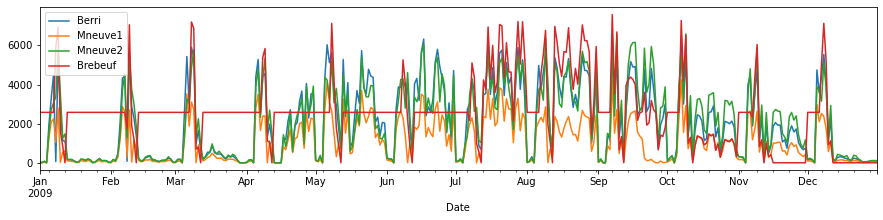

In [57]:
d.plot(figsize=(15,3))

<AxesSubplot:xlabel='Date'>

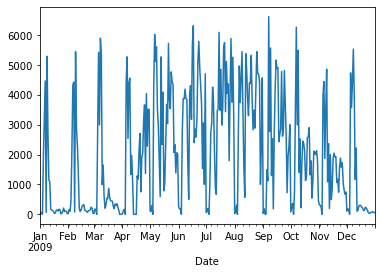

In [58]:
d.Berri.plot()

<AxesSubplot:xlabel='Date'>

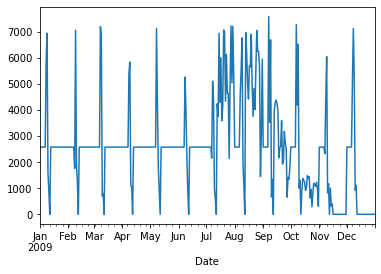

In [59]:
d.Brebeuf.plot()

In [60]:
d.Berri.cumsum()

Date
2009-01-01        29
2009-01-02        43
2009-01-03       110
2009-01-04       110
2009-01-05      2035
               ...  
2009-12-27    741474
2009-12-28    741535
2009-12-29    741624
2009-12-30    741700
2009-12-31    741753
Name: Berri, Length: 365, dtype: int64

<AxesSubplot:xlabel='Date'>

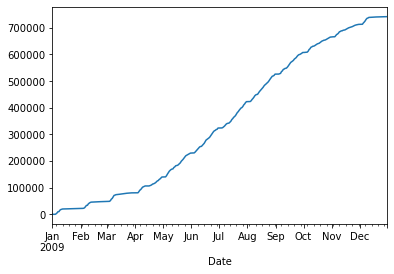

In [61]:
d.Berri.cumsum().plot()

Notice the constant value between 2000 and 3000: they were the NaN values that we replaced!

## Grouping

In [62]:
d["month"] = [i.month for i in d.index] # i.month: we extract the month from the index value; this is specific for date indexes.
d

,Berri,Mneuve1,Mneuve2,Brebeuf,month
Date,,,,,
2009-01-01,29,20,35,2576.359551,1
2009-01-02,14,2,2,2576.359551,1
2009-01-03,67,30,80,2576.359551,1
2009-01-04,0,0,0,2576.359551,1
2009-01-05,1925,1256,1501,2576.359551,1
...,...,...,...,...,...
2009-12-27,66,29,52,0.000000,12
2009-12-28,61,41,99,0.000000,12
2009-12-29,89,52,115,0.000000,12


In [63]:
d.groupby("month").max()

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,5298,2796,5765,6939.0
2,5451,2868,5517,7052.0
3,5904,3523,5762,7194.0
4,5278,3499,5327,5837.0
5,6028,4120,5397,7121.0
6,6320,3499,6047,5259.0
7,6100,3825,5536,7219.0
8,5452,2865,6379,7044.0
9,6626,4227,6535,7575.0


In [64]:
d.groupby("month").min()

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,0,0,0,0.0
2,19,3,17,0.0
3,0,0,0,0.0
4,0,0,0,0.0
5,0,0,0,0.0
6,0,0,0,0.0
7,0,0,0,0.0
8,0,0,0,0.0
9,0,0,0,0.0


In [65]:
d.groupby("month").count()

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,31,31,31,31
2,28,28,28,28
3,31,31,31,31
4,30,30,30,30
5,31,31,31,31
6,30,30,30,30
7,31,31,31,31
8,31,31,31,31
9,30,30,30,30


In [66]:
new_df = d.groupby("month").mean()
new_df

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,710.548387,384.193548,809.419355,2652.914462
2,939.321429,481.285714,1022.321429,2541.973917
3,1037.967742,560.903226,962.000000,2662.785430
4,1983.033333,1182.666667,1946.833333,2593.066292
5,2893.838710,1683.709677,2502.548387,2611.946720
6,3135.066667,1608.100000,3005.166667,2559.299625
7,3194.677419,1902.032258,3103.096774,4104.585719
8,3331.193548,1534.096774,3315.161290,4349.940558
9,2703.533333,932.033333,3203.733333,2821.005243


#### Export dataframe

In [67]:
new_df.to_csv('new_dataset.csv', index = True) # then, check your folder!

In [81]:
dataset = pd.read_csv('new_dataset.csv', index_col=0)
dataset

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,710.548387,384.193548,809.419355,2652.914462
2,939.321429,481.285714,1022.321429,2541.973917
3,1037.967742,560.903226,962.000000,2662.785430
4,1983.033333,1182.666667,1946.833333,2593.066292
5,2893.838710,1683.709677,2502.548387,2611.946720
6,3135.066667,1608.100000,3005.166667,2559.299625
7,3194.677419,1902.032258,3103.096774,4104.585719
8,3331.193548,1534.096774,3315.161290,4349.940558
9,2703.533333,932.033333,3203.733333,2821.005243


In [82]:
dataset["New_Column"] = 23
dataset

,Berri,Mneuve1,Mneuve2,Brebeuf,New_Column
month,,,,,
1,710.548387,384.193548,809.419355,2652.914462,23
2,939.321429,481.285714,1022.321429,2541.973917,23
3,1037.967742,560.903226,962.000000,2662.785430,23
4,1983.033333,1182.666667,1946.833333,2593.066292,23
5,2893.838710,1683.709677,2502.548387,2611.946720,23
6,3135.066667,1608.100000,3005.166667,2559.299625,23
7,3194.677419,1902.032258,3103.096774,4104.585719,23
8,3331.193548,1534.096774,3315.161290,4349.940558,23
9,2703.533333,932.033333,3203.733333,2821.005243,23


---

In [69]:
products_df = pd.read_csv("data/instacart/products.csv", index_col=0)
products_df

,product_name,aisle_id,department_id
product_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13
...,...,...,...
49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49685,En Croute Roast Hazelnut Cranberry,42,1
49686,Artisan Baguette,112,3


In [70]:
products_df.aisle_id.unique()

array([ 61, 104,  94,  38,   5,  11,  98, 116, 120, 115,  31, 119,  74,
        56, 103,  35,  79,  63,  40,  20,  49,  47,   3,  41, 127, 121,
        81, 123, 107, 131, 106,  69, 100,  64,  78,  83,  58,  66,  87,
        14, 105,  22, 134,  23, 111, 128,  50,   9,  96,  92,  89,  88,
       130,  26,  77,  65,  12,  95,  19,   7,   6,  97,   2, 112,  10,
        51,  13,  75,  70,  93,  34,  62,  21,  29,  45, 118,   4, 108,
        37, 109,  91,  24,  67, 132,  25, 129,  46,  16,  52,  17,  73,
       122,  42,  59, 126,  33,   1,   8,  82, 114, 124, 117,  72, 110,
        85,  44,  80, 101,  84,  30,  27,  90,  48, 133,  53,  28,  68,
        43, 125,  57,  15,  55,  36,  54, 102,  60,  99,  18,  39,  71,
       113,  86,  32,  76], dtype=int64)

In [71]:
products_df.aisle_id.unique().max()

134

In [72]:
outcome = np.unique(products_df.aisle_id, return_counts=True)
outcome

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134], dtype=int64),
 array([ 146,  271,  832,  543,  409,  548,  100,  297,  399,  218,  427,
         123,  317,  159,   80,   86,  623,   12,  375,  565,  891,  816,
         316,  382,  525,  680,  385,  232,  229,  257,  675,   32,  169,
     

In [73]:
outcome[0]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134], dtype=int64)

In [74]:
outcome[1]

array([ 146,  271,  832,  543,  409,  548,  100,  297,  399,  218,  427,
        123,  317,  159,   80,   86,  623,   12,  375,  565,  891,  816,
        316,  382,  525,  680,  385,  232,  229,  257,  675,   32,  169,
        229,   82,  150, 1091,  880,   54,  473,  499,  189,  195,  113,
       1246,  168, 1038,  173,   99,  356,  264,  296,  161,  322,  198,
        187,  185,   81,  342,  112,  874,  147,  336,  294,  325,  605,
        327,   26,  737,  338,   98,  466,  277,  204,  506,  108,  463,
        747,  335,  317,  487,   44,  569,  243,  206,  125,  308,  493,
        560,  223,  293,  718,  226,  894,  283,  373,  290,  792,  243,
       1258,  355,  132,   85,  797,  463,  387,  989,  191,  245,  402,
        199,  557,   47,  655,  344,  361,  582,  240,  112, 1026,  454,
        105,  615,  195,   69,  285,  504,  241,  386,  303,  457,  178,
        172,   95], dtype=int64)

In [75]:
products_df.aisle_id.value_counts()

100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: aisle_id, Length: 134, dtype: int64

In [76]:
products_df.aisle_id.value_counts()[:5]

100    1258
45     1246
37     1091
47     1038
120    1026
Name: aisle_id, dtype: int64

In [77]:
outcome = dict(products_df.aisle_id.value_counts())
outcome

{100: 1258,
 45: 1246,
 37: 1091,
 47: 1038,
 120: 1026,
 107: 989,
 94: 894,
 21: 891,
 38: 880,
 61: 874,
 3: 832,
 22: 816,
 104: 797,
 98: 792,
 78: 747,
 69: 737,
 92: 718,
 26: 680,
 31: 675,
 114: 655,
 17: 623,
 123: 615,
 66: 605,
 117: 582,
 83: 569,
 20: 565,
 89: 560,
 112: 557,
 6: 548,
 4: 543,
 25: 525,
 75: 506,
 127: 504,
 41: 499,
 88: 493,
 81: 487,
 40: 473,
 72: 466,
 77: 463,
 105: 463,
 131: 457,
 121: 454,
 11: 427,
 5: 409,
 110: 402,
 9: 399,
 106: 387,
 129: 386,
 27: 385,
 24: 382,
 19: 375,
 96: 373,
 116: 361,
 50: 356,
 101: 355,
 115: 344,
 59: 342,
 70: 338,
 63: 336,
 79: 335,
 67: 327,
 65: 325,
 54: 322,
 80: 317,
 13: 317,
 23: 316,
 87: 308,
 130: 303,
 8: 297,
 52: 296,
 64: 294,
 91: 293,
 97: 290,
 126: 285,
 95: 283,
 73: 277,
 2: 271,
 51: 264,
 30: 257,
 109: 245,
 99: 243,
 84: 243,
 128: 241,
 118: 240,
 28: 232,
 29: 229,
 34: 229,
 93: 226,
 90: 223,
 10: 218,
 85: 206,
 74: 204,
 111: 199,
 55: 198,
 43: 195,
 124: 195,
 108: 191,
 42: 1

In [78]:
outcome.values()

dict_values([1258, 1246, 1091, 1038, 1026, 989, 894, 891, 880, 874, 832, 816, 797, 792, 747, 737, 718, 680, 675, 655, 623, 615, 605, 582, 569, 565, 560, 557, 548, 543, 525, 506, 504, 499, 493, 487, 473, 466, 463, 463, 457, 454, 427, 409, 402, 399, 387, 386, 385, 382, 375, 373, 361, 356, 355, 344, 342, 338, 336, 335, 327, 325, 322, 317, 317, 316, 308, 303, 297, 296, 294, 293, 290, 285, 283, 277, 271, 264, 257, 245, 243, 243, 241, 240, 232, 229, 229, 226, 223, 218, 206, 204, 199, 198, 195, 195, 191, 189, 187, 185, 178, 173, 172, 169, 168, 161, 159, 150, 147, 146, 132, 125, 123, 113, 112, 112, 108, 105, 100, 99, 98, 95, 86, 85, 82, 81, 80, 69, 54, 47, 44, 32, 26, 12])